<a href="https://colab.research.google.com/github/agrat-20/ICG-Summer-Program-2021-DS/blob/main/190892_TanishaAgrawal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import files
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
import tensorflow as tf
from keras.datasets import fashion_mnist

In [ ]:
#Loading the dataset as training set and testing set
(X_train, Y_train),(X_test, Y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert Y_train.shape == (60000,)
assert X_test.shape == (10000, 28, 28)
assert Y_test.shape == (10000,)

In [ ]:
#Splitting the training data into the 80-20 ratio to get validation dataset
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 12345)
X_train.shape

(48000, 28, 28)

In [ ]:
X_train.shape   #Shape of X_train after splitting

(48000, 28, 28)

In [ ]:
X_valid.shape   #Shape of X_valid after splitting

(12000, 28, 28)

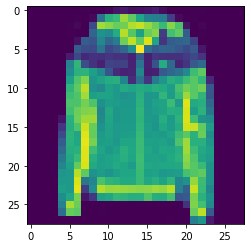

In [ ]:
#To actually see the images in X_train by reshaping the array of pixels into the images.
image = X_train[26, : ].reshape((28,28))
plt.imshow(image)
plt.show()   

In [ ]:
im_rows = 28
im_cols = 28
batch_size = 512
n_epochs = 50
im_shape = (im_rows, im_cols, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)     #Converting the X_train from pixels format to image format as shown in above cell.
X_train.shape

(48000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(X_test.shape[0], *im_shape)        #Converting the X_test from pixels format to image format.
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_valid = X_valid.reshape(X_valid.shape[0], *im_shape)    #Converting the X_valid from pixels format to image format
X_valid.shape

(12000, 28, 28, 1)

In [ ]:
#Defining simple sequential cnn model using different layers. Dropout layers are used to nullify the overfitting.
cnn_model = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=im_shape),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=3),
    Dropout(0.2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.3),                     
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

In [ ]:
#Compiling the model
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
#Fitting the model on validation set.
model = cnn_model.fit(
    X_train, Y_train, batch_size=batch_size,
    epochs=50, verbose=1,
    validation_data=(X_valid, Y_valid),
)

Epoch 1/50
94/94 [==============================] - 18s 34ms/step - loss: 3.6258 - accuracy: 0.3840 - val_loss: 0.4899 - val_accuracy: 0.8272
Epoch 2/50
94/94 [==============================] - 2s 23ms/step - loss: 0.6764 - accuracy: 0.7742 - val_loss: 0.3755 - val_accuracy: 0.8717
Epoch 3/50
94/94 [==============================] - 2s 22ms/step - loss: 0.5025 - accuracy: 0.8259 - val_loss: 0.3373 - val_accuracy: 0.8849
Epoch 4/50
94/94 [==============================] - 2s 23ms/step - loss: 0.4463 - accuracy: 0.8456 - val_loss: 0.3051 - val_accuracy: 0.8938
Epoch 5/50
94/94 [==============================] - 2s 22ms/step - loss: 0.3979 - accuracy: 0.8643 - val_loss: 0.2947 - val_accuracy: 0.8978
Epoch 6/50
94/94 [==============================] - 2s 22ms/step - loss: 0.3664 - accuracy: 0.8719 - val_loss: 0.2748 - val_accuracy: 0.9062
Epoch 7/50
94/94 [==============================] - 2s 23ms/step - loss: 0.3439 - accuracy: 0.8809 - val_loss: 0.2628 - val_accuracy: 0.9079
Epoch 8/50
9

In [ ]:
# Evaluating score on the test data.
score = cnn_model.evaluate(X_test, Y_test, verbose=0)

print('test loss: {:.4f}'.format(score[0]))
print('test acc: {:.4f}'.format(score[1]))

test loss: 0.3027
test acc: 0.9172


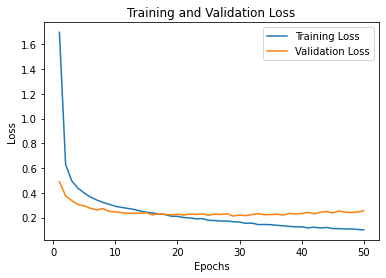

In [ ]:
#Definig number of epochs and then plotting the graph representing the training and validation loss.
epochs = range(1, 1+n_epochs)
plt.plot(epochs,  model.history['loss'], label='Training Loss')
plt.plot(epochs,  model.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

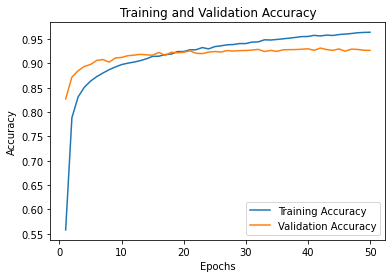

In [ ]:
#Plotting the graph representing the training and validation accuracy.
plt.plot(epochs,  model.history['accuracy'], label='Training Accuracy')
plt.plot(epochs,  model.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

References: 
1. https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/
2. https://www.youtube.com/playlist?list=PLZbbT5o_s2xq7LwI2y8_QtvuXZedL6tQU
3. https://github.com/markjay4k/Fashion-MNIST-with-Keras/blob/master/Part%202%20-%20CNN%20fashion%20MNIST%20-%20basic%20CNN.ipynb
4. https://keras.io/